# Early Warning Signals for Phase Transitions
### Phase transitions in the 2D Ising model (first or second order) are simulated and used to train a CNN-LSTM neural classifier to detect early warning signals for an oncoming tipping point

In [1]:
import ising_model_generate_data
import ising_model_prepare_train_data
import Ising_train_CNN_LSTM

## Parameter Definitions

In [2]:
params = {}

The variable **order_param** is used to determine the type of Ising model simulated. **temp** means temperature is varied, producing a second-order phase transition. **h** means external magnetic field is varied, producing a first-order phase transition. **temp_lin** and **h_lin** are similar, with the only difference being the treatment of null runs (in which the parameter does not pass through its critical value/region). The **lin** suffix means that the null runs are generated by varying the parameter linearly, but keeping it far from the critical point. No suffix means that the null runs are generated by holding the parameter fixed. The **local** suffix means that the forcing parameter is varied non-uniformly in space, so the critical threshold is crossed only in some localized subregion of the lattice (loosely simulating a non-equilibrium phase transition)

In [32]:
params['order_param'] = 'h_lin'
# params['order_param'] = 'temp_lin'

# params['order_param'] = 'h'
# params['order_param'] = 'temp'
# params['order_param'] = 'temp_local'

**mask_type** refers to the method by which Ising lattice sites are selectively omitted (in order to break the lattice symmetry of the system). A value of None means no masking, while a value of 'ellipse' means a randomized elliptical region of the lattice will be excised.

In [33]:
# params['mask_type'] = None
params['mask_type'] = 'ellipse'

**smoothing** determines the preprocessing step applied to the output data before it is used for training. 'gaussian' applies a gaussian smoothing filter to the time series (along the temporal dimension) and subtracts the result off from the Ising run, leaving only the residual behind. A value of None skips this step and passes on the full Ising output.

In [34]:
# params['smoothing'] = None
params['smoothing'] = 'gaussian'

In [35]:
params['plot_stats'] = True # Plot statistics of the Ising system (net magnetization, spatial correlation, etc.)

params['process_data'] = False # Toggle whether Ising output is preprocessed (Execute one or both of the below processing steps)
params['process_raw'] = True # Output processed results before computing EWS (normalized residuals after Gaussian smoothing)
params['process_ews'] = True # Output computed EWS for processed results (statistics such as variance and lag-1 AC)

params['target_duration'] = 600 # Number of time steps in generated training sequences
params['target_size'] = 256 # Ising lattice dimension

params['n_runs'] = 1000 # Number of Ising runs to simulate
params['burn_time'] = 50 # Number of epochs to run each Ising simulation (at constant temperature/field) before
                         # beginning to force the system, allowing it to come to an initial equilibrium
    
params['which_hp'] = [16]   # Which preset combination of model hyperparameters to use for the neural network
                            # (Definitions can be found in Ising_train_CNN_LSTM.py)

## Generate Ising Training Data
#### Using chosen parameter values

In [ ]:
ising_model_generate_data.main(params)

In [ ]:
ising_model_prepare_train_data.main(params)

## Train Model

In [ ]:
Ising_train_CNN_LSTM.main(params)

## Plot Results

## Model 16

### all coordinates

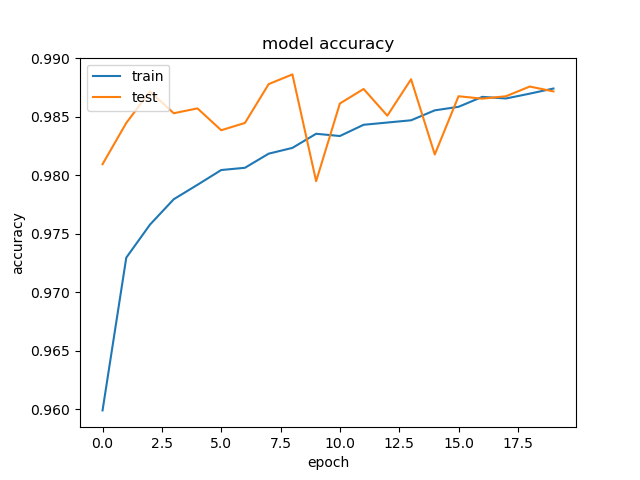

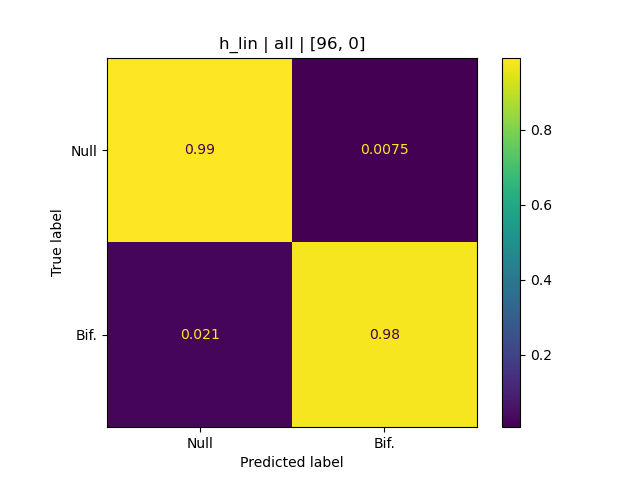

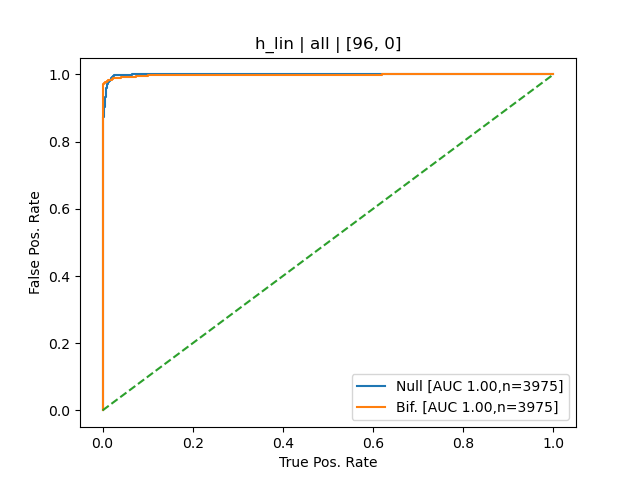

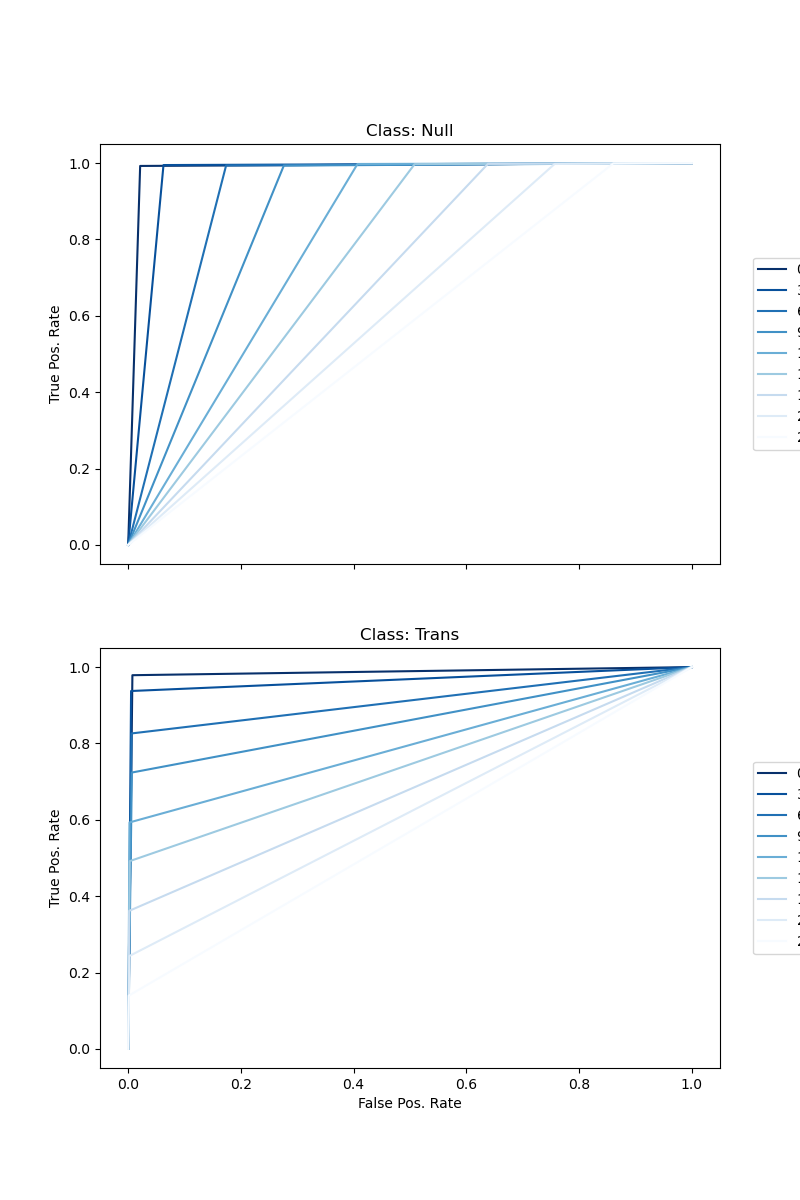

### temporal coordinates

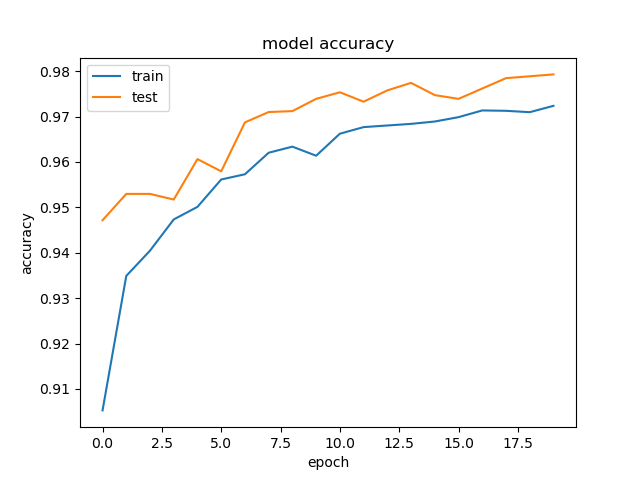

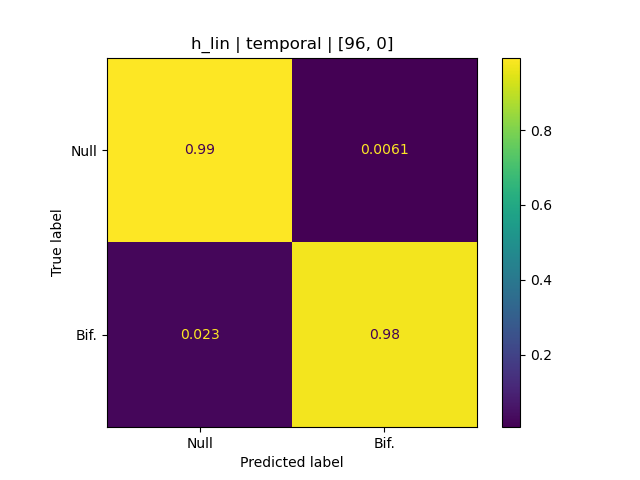

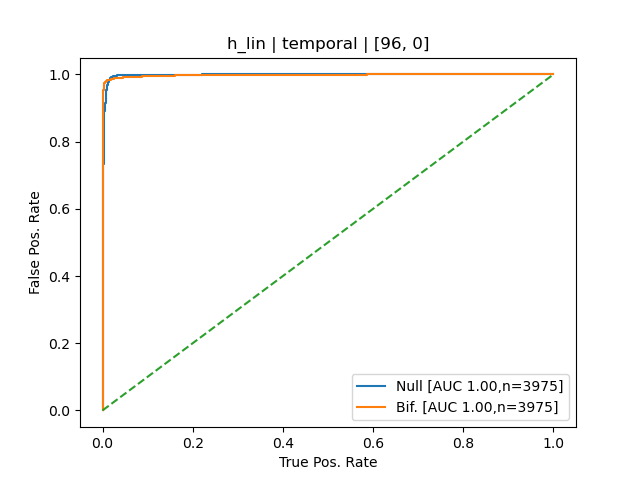

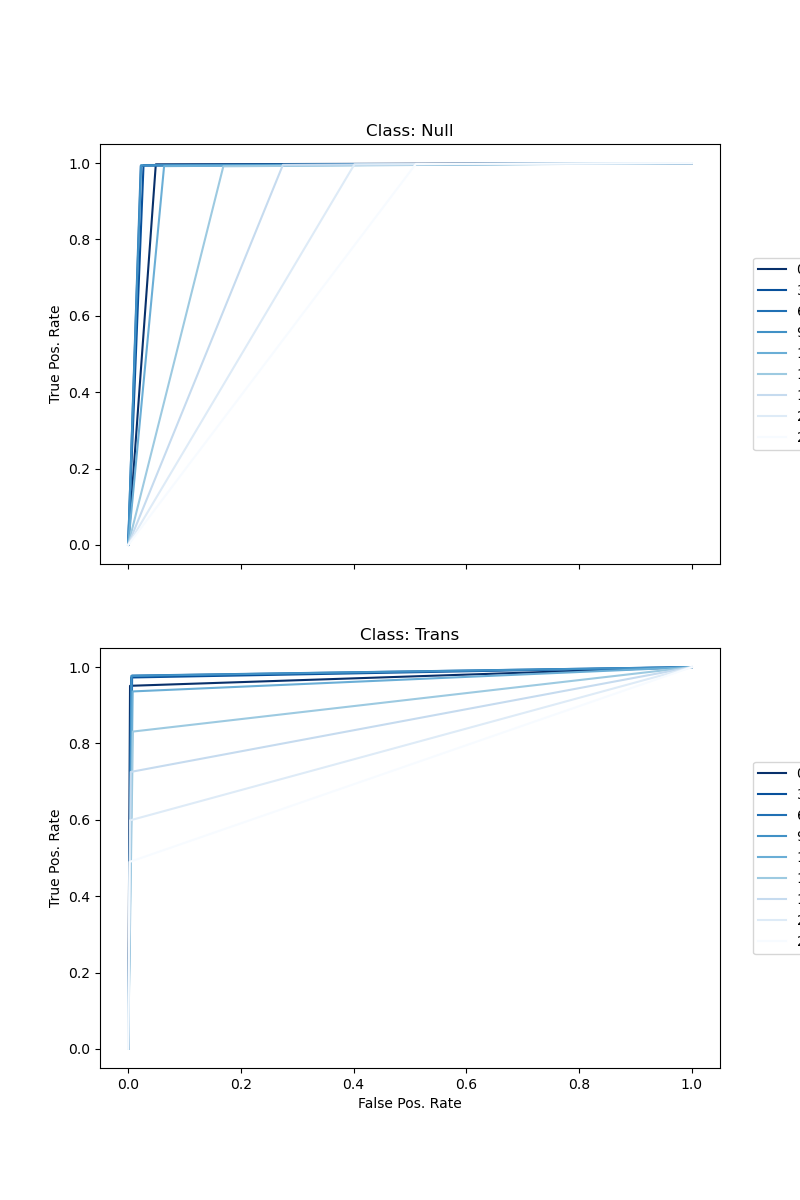

### spatial coordinates

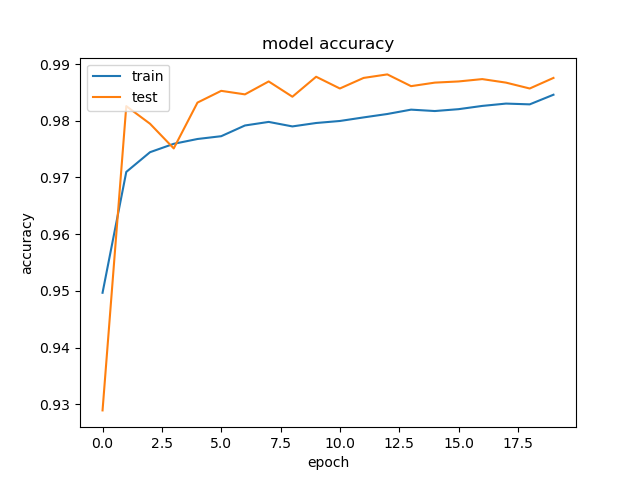

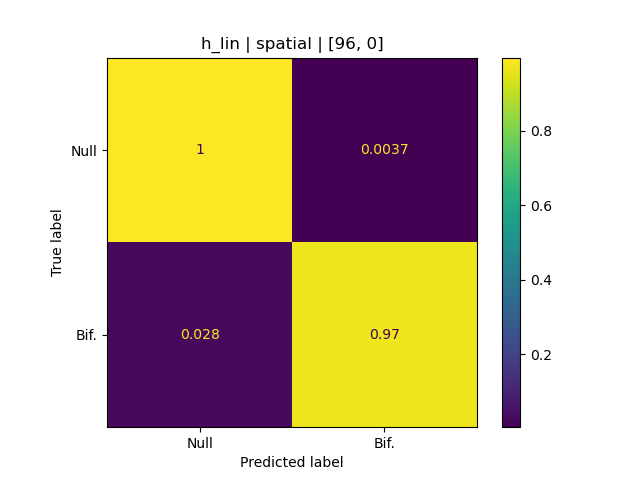

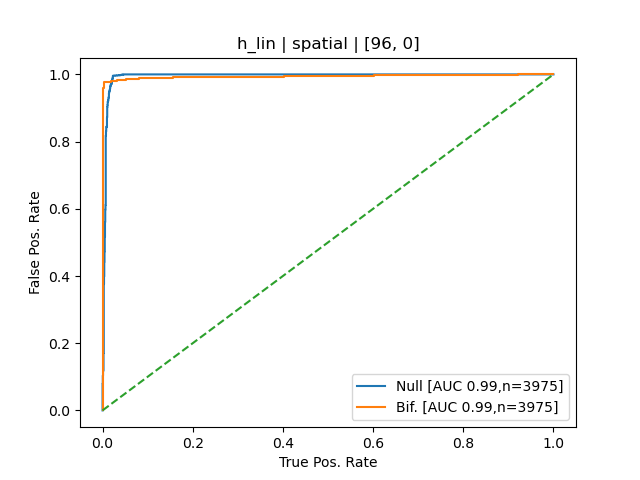

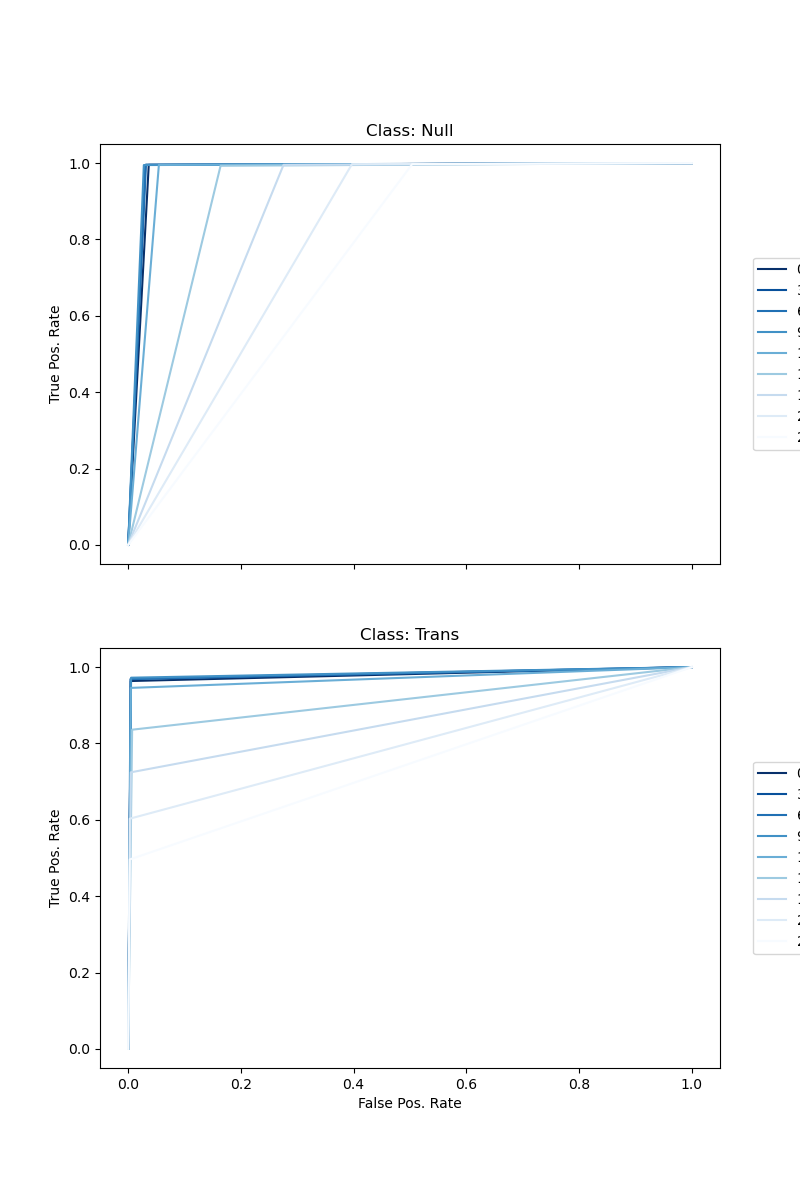

In [37]:
from IPython.display import Image, display, Markdown
import os
train_coord_list = ['all','temporal','spatial']

smoothing = params['smoothing']
data_type = 'EWS'
    
if smoothing == 'gaussian':
    # smooth_param = [24,0]
    # smooth_param = [48,0]
    smooth_param = [96,0]

which_hp = params['which_hp']

if params['mask_type'] is None:
    base_dir = os.path.join('Ising_Output','var_'+params['order_param'])
else:
    base_dir = os.path.join('Ising_Output','var_'+params['order_param']+'_'+params['mask_type'])

if smoothing == None:
    data_dir = os.path.join(base_dir,'Processed',data_type)
    out_dir = os.path.join(base_dir,'Trained Models')
elif smoothing == 'gaussian':
    data_dir = os.path.join(base_dir,'Processed','Gaussian_{}_{}'.format(smooth_param[0],smooth_param[1]),data_type)
    out_dir = os.path.join(base_dir,'Trained Models','Gaussian_{}_{}'.format(smooth_param[0],smooth_param[1]))
   
for pj in which_hp:
    display(Markdown('## Model {}'.format(pj)))
    for train_coords in train_coord_list:
        display(Markdown('### {} coordinates'.format(train_coords)))

        hp_dir = os.path.join(out_dir,'CNN_LSTM','HP_'+ str(pj)) + '_' + train_coords
        plot_dir = os.path.join(hp_dir,'Plots')

        im = Image(filename=os.path.join(plot_dir,'Train_history.png'), width = 400)
        display(im)
        
        im = Image(filename=os.path.join(plot_dir,'Confusion_Matrix.png'), width = 400)
        display(im)
        
        im = Image(filename=os.path.join(plot_dir,'ROC_curves.png'), width = 400)
        display(im)
        
        im = Image(filename=os.path.join(plot_dir,'ROC_curves_time_lags.png'), width = 400)
        display(im)
